In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.getcwd()

'/home/madface/Great_Learning'

# Removing Unnecessary columns

In [3]:
fifa=pd.read_csv('/home/madface/Downloads/fifa.csv')
fifa_test=pd.read_csv('/home/madface/Downloads/fifa.csv')
fifa_var_summary=pd.read_csv('/home/madface/Downloads/fifa_+variable_information.csv')

In [5]:
fifa.head(1).T

,0
ID,158023
Name,L. Messi
Age,31
Photo,https://cdn.sofifa.org/players/4/19/158023.png
Nationality,Argentina
Flag,https://cdn.sofifa.org/flags/52.png
Overall,94
Potential,94
Club,FC Barcelona
Club Logo,https://cdn.sofifa.org/teams/2/light/241.png


In [4]:
fifa_cols=fifa.columns

In [5]:
fifa_cols

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [7]:
fifa_var_summary.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [8]:
fifa_cols[[0,3,4,5,9,17,19]]

Index(['ID', 'Photo', 'Nationality', 'Flag', 'Club Logo', 'Body Type',
       'Jersey Number'],
      dtype='object')

In [9]:
drop_col=fifa_cols[[0,3,4,5,9,17,19]]

In [10]:
fifa=fifa.drop(drop_col,axis=1)

In [11]:
fifa.shape

(18207, 53)

In [12]:
fifa_test.shape

(18207, 60)

In [13]:
#here we have dropped these 7 columns because it's never going to playb an important role lin our Model 
# Creation.

# Data cleaning

In [14]:
fifa.head(1)

,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M


In [15]:
fifa.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

# Value Column

In [16]:
# fifa['Value']=test['Value']

In [17]:
fifa['Value']=fifa['Value'].str.replace('€','')

In [18]:
c_value=0   ### Creating counter in order to create the dictionary with the index such that
            ### we can create the dataframe later on.
D_value={}  ### Blacnk dictionary where we will put the converted value over here
for i in fifa['Value']:
    if '.' in i:
        i=i.replace('.','').replace('M','00000').replace('K','00').replace('€','')
        D_value.update({c_value:i})
        c_value=c_value+1
    else:
        i=i.replace('.','').replace('M','000000').replace('K','000').replace('€','')
        D_value.update({c_value:i})
        c_value=c_value+1
print(D_value)

{0: '110500000', 1: '77000000', 2: '118500000', 3: '72000000', 4: '102000000', 5: '93000000', 6: '67000000', 7: '80000000', 8: '51000000', 9: '68000000', 10: '77000000', 11: '76500000', 12: '44000000', 13: '60000000', 14: '63000000', 15: '89000000', 16: '83500000', 17: '78000000', 18: '58000000', 19: '53500000', 20: '51500000', 21: '60000000', 22: '38000000', 23: '64500000', 24: '27000000', 25: '81000000', 26: '69500000', 27: '59500000', 28: '69500000', 29: '62000000', 30: '73500000', 31: '73500000', 32: '69500000', 33: '59000000', 34: '46000000', 35: '43000000', 36: '60000000', 37: '36000000', 38: '57000000', 39: '24000000', 40: '30000000', 41: '4000000', 42: '57000000', 43: '64500000', 44: '51000000', 45: '64000000', 46: '30500000', 47: '62500000', 48: '52000000', 49: '38000000', 50: '45000000', 51: '34000000', 52: '46500000', 53: '46500000', 54: '34000000', 55: '61000000', 56: '59500000', 57: '41500000', 58: '52000000', 59: '44500000', 60: '56500000', 61: '53000000', 62: '50000000',

In [19]:
fifa['Value']=pd.Series(D_value)

In [20]:
fifa['Value'].head()

0    110500000
1     77000000
2    118500000
3     72000000
4    102000000
Name: Value, dtype: object

In [21]:
fifa['Value'] = fifa['Value'].astype(float)

# Wage

In [22]:
l1_wage=[]  ### We can do the same replcaement either by creating dictionary or by creating list.
for i in fifa['Wage']:
    i=str(i)
    if '.' in i:
        i=i.replace('.','').replace('M','00000').replace('K','00').replace('€','')      
        l1_wage.append(float(i))
    else:
        i=i.replace('.','').replace('M','000000').replace('K','000').replace('€','')
        l1_wage.append(float(i))

In [23]:
fifa['Wage'] = pd.Series(l1_wage)

In [24]:
fifa['Wage'] = fifa['Wage'].astype(float)

In [25]:
fifa[['Wage','Value']].head()

,Wage,Value
0,565000.0,110500000.0
1,405000.0,77000000.0
2,290000.0,118500000.0
3,260000.0,72000000.0
4,355000.0,102000000.0


# Release Clause

In [26]:
fifa.head(1).T

,0
Name,L. Messi
Age,31
Overall,94
Potential,94
Club,FC Barcelona
Value,1.105e+08
Wage,565000
Preferred Foot,Left
International Reputation,5
Weak Foot,4


In [27]:
fifa['Release Clause'].head()


0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object

In [28]:
l2_release=[]
for i in fifa['Release Clause']:
    i=str(i)
    if '.' in i:
        i=i.replace('.','').replace('M','00000').replace('K','00').replace('€','')      
        l2_release.append(float(i))
    else:
        i=i.replace('.','').replace('M','000000').replace('K','000').replace('€','')
        l2_release.append(float(i))

In [29]:
l2_release[0:10]

[226500000.0,
 127100000.0,
 228100000.0,
 138600000.0,
 196400000.0,
 172100000.0,
 137400000.0,
 164000000.0,
 104600000.0,
 144500000.0]

In [30]:
fifa['Release Clause'] = pd.Series(l2_release)

In [31]:
fifa['Release Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64

In [32]:
fifa.head(1)

,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0


# JOINED

In [33]:
fifa.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [34]:
fifa[['Joined','Contract Valid Until','Height','Weight']].head()

,Joined,Contract Valid Until,Height,Weight
0,"Jul 1, 2004",2021,5'7,159lbs
1,"Jul 10, 2018",2022,6'2,183lbs
2,"Aug 3, 2017",2022,5'9,150lbs
3,"Jul 1, 2011",2020,6'4,168lbs
4,"Aug 30, 2015",2023,5'11,154lbs


In [35]:
Joined=[]
for i in fifa['Joined']:
    if type(i)==type(6.0):
        Joined.append(float('NaN'))
    else:
        Joined.append((int(i.split(',')[1][1:])))


In [36]:
fifa['Joined']=pd.Series(Joined)

In [37]:
fifa['Joined']=fifa['Joined'].fillna(fifa['Joined'].mode()[0])

In [38]:
# fifa['Joined']=fifa['Joined'].astype(int)
# fifa['Joined'].astype(int)

In [39]:
fifa['Joined']

0        2004.0
1        2018.0
2        2017.0
3        2011.0
4        2015.0
5        2012.0
6        2012.0
7        2014.0
8        2005.0
9        2014.0
10       2014.0
11       2014.0
12       2010.0
13       2010.0
14       2016.0
15       2015.0
16       2010.0
17       2014.0
18       2014.0
19       2018.0
20       2008.0
21       2013.0
22       2011.0
23       2011.0
24       2005.0
25       2018.0
26       2017.0
27       2013.0
28       2018.0
29       2010.0
          ...  
18177    2016.0
18178    2018.0
18179    2018.0
18180    2013.0
18181    2017.0
18182    2018.0
18183    2018.0
18184    2017.0
18185    2018.0
18186    2016.0
18187    2017.0
18188    2017.0
18189    2017.0
18190    2018.0
18191    2018.0
18192    2018.0
18193    2018.0
18194    2018.0
18195    2018.0
18196    2017.0
18197    2018.0
18198    2018.0
18199    2018.0
18200    2015.0
18201    2018.0
18202    2017.0
18203    2018.0
18204    2017.0
18205    2018.0
18206    2018.0
Name: Joined, Length: 18

In [40]:
fifa[['Joined','Contract Valid Until','Height','Weight']].head()

,Joined,Contract Valid Until,Height,Weight
0,2004.0,2021,5'7,159lbs
1,2018.0,2022,6'2,183lbs
2,2017.0,2022,5'9,150lbs
3,2011.0,2020,6'4,168lbs
4,2015.0,2023,5'11,154lbs


# CONTRACT VALID UNTIL

In [41]:
contract_valid_until=[]
for i in fifa['Contract Valid Until']:
    if type(i)==float:
        contract_valid_until.append(i)
    else:
        x=i.replace(' ','').split(',')
        if len(x)==1:
            contract_valid_until.append((x[0]))
        else:
            contract_valid_until.append(x[1])


In [42]:
um=pd.Series(contract_valid_until)

In [43]:
fifa['Contract Valid Until']=um

In [44]:
fifa['Contract Valid Until'].fillna(fifa['Contract Valid Until'].mode()[0])

0        2021
1        2022
2        2022
3        2020
4        2023
5        2020
6        2020
7        2021
8        2020
9        2021
10       2021
11       2022
12       2019
13       2020
14       2023
15       2022
16       2024
17       2023
18       2022
19       2024
20       2023
21       2020
22       2021
23       2021
24       2020
25       2022
26       2023
27       2021
28       2019
29       2022
         ... 
18177    2019
18178    2018
18179    2020
18180    2019
18181    2018
18182    2021
18183    2023
18184    2021
18185    2018
18186    2019
18187    2020
18188    2021
18189    2020
18190    2021
18191    2021
18192    2021
18193    2021
18194    2021
18195    2018
18196    2021
18197    2018
18198    2021
18199    2021
18200    2019
18201    2018
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: object

In [45]:
fifa['Contract Valid Until']=pd.to_datetime(fifa['Contract Valid Until'],format='%Y')

In [46]:
fifa[['Joined','Contract Valid Until']]

,Joined,Contract Valid Until
0,2004.0,2021-01-01
1,2018.0,2022-01-01
2,2017.0,2022-01-01
3,2011.0,2020-01-01
4,2015.0,2023-01-01
5,2012.0,2020-01-01
6,2012.0,2020-01-01
7,2014.0,2021-01-01
8,2005.0,2020-01-01
9,2014.0,2021-01-01


In [47]:
fifa[['Height','Weight']]

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs
5,5'8,163lbs
6,5'8,146lbs
7,6'0,190lbs
8,6'0,181lbs
9,6'2,192lbs


# HEIGHT

In [48]:
he=fifa['Height'][1].split("'")

In [49]:
round((float(he[0])*30.48+float(he[1])*2.54),2)

187.96

In [50]:
he

['6', '2']

In [51]:
HEIGHT=[]
for i in fifa['Height']:
    if type(i)==type(6.0):
        HEIGHT.append(i)
    else:
        h=i.split("'")
        HEIGHT.append(round((float(h[0])*30.48+float(h[1])*2.54),2))

In [52]:
HEIGHT

[170.18,
 187.96,
 175.26,
 193.04,
 180.34,
 172.72,
 172.72,
 182.88,
 182.88,
 187.96,
 182.88,
 182.88,
 187.96,
 172.72,
 167.64,
 177.8,
 187.96,
 175.26,
 187.96,
 198.12,
 187.96,
 185.42,
 193.04,
 172.72,
 187.96,
 177.8,
 175.26,
 185.42,
 180.34,
 162.56,
 175.26,
 180.34,
 172.72,
 187.96,
 190.5,
 175.26,
 185.42,
 187.96,
 185.42,
 182.88,
 193.04,
 193.04,
 182.88,
 180.34,
 187.96,
 193.04,
 185.42,
 190.5,
 185.42,
 170.18,
 170.18,
 187.96,
 182.88,
 182.88,
 193.04,
 182.88,
 172.72,
 187.96,
 175.26,
 193.04,
 170.18,
 180.34,
 190.5,
 165.1,
 180.34,
 172.72,
 185.42,
 175.26,
 180.34,
 177.8,
 190.5,
 185.42,
 177.8,
 187.96,
 180.34,
 177.8,
 170.18,
 187.96,
 190.5,
 182.88,
 172.72,
 190.5,
 175.26,
 182.88,
 177.8,
 180.34,
 175.26,
 175.26,
 187.96,
 182.88,
 182.88,
 182.88,
 195.58,
 170.18,
 175.26,
 193.04,
 180.34,
 185.42,
 193.04,
 187.96,
 187.96,
 175.26,
 198.12,
 180.34,
 185.42,
 185.42,
 182.88,
 190.5,
 187.96,
 195.58,
 187.96,
 185.42,
 180.3

In [53]:
fifa['Height']=pd.Series(HEIGHT)

In [54]:
fifa['Height'].isna().sum()

48

In [55]:
fifa['Height'].describe()

count    18159.000000
mean       181.257584
std          6.730145
min        154.940000
25%        175.260000
50%        180.340000
75%        185.420000
max        205.740000
Name: Height, dtype: float64

In [56]:
fifa['Height']=fifa['Height'].fillna(fifa['Height'].median())

In [57]:
fifa['Height'].describe()

count    18207.000000
mean       181.255164
std          6.721432
min        154.940000
25%        175.260000
50%        180.340000
75%        185.420000
max        205.740000
Name: Height, dtype: float64

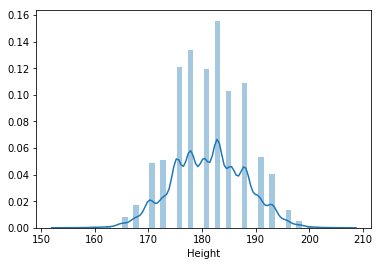

In [58]:
sns.distplot(fifa['Height'])

In [59]:
#********BELOW GIVEN IS TESTING********######

In [60]:
test=pd.read_csv('/home/madface/Downloads/fifa.csv')

In [61]:
test['Height']=pd.Series(HEIGHT)

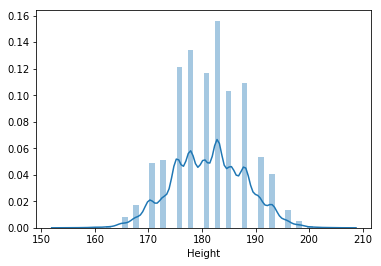

In [62]:
sns.distplot(test['Height'].dropna())

# WEIGHT

In [63]:
fifa['Weight']=fifa['Weight'].str.replace('lbs','').apply(float)

In [64]:
fifa['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [65]:
fifa['Weight'].isna().sum()

48

In [66]:
fifa['Weight'].describe()

count    18159.000000
mean       165.979129
std         15.593344
min        110.000000
25%        154.000000
50%        165.000000
75%        176.000000
max        243.000000
Name: Weight, dtype: float64

In [67]:
fifa['Weight']=fifa['Weight'].fillna(fifa['Weight'].median())

In [69]:
fifa[['Value','Wage','Joined','Contract Valid Until','Height','Weight','Release Clause']].head()

,Value,Wage,Joined,Contract Valid Until,Height,Weight,Release Clause
0,110500000.0,565000.0,2004.0,2021-01-01,170.18,159.0,226500000.0
1,77000000.0,405000.0,2018.0,2022-01-01,187.96,183.0,127100000.0
2,118500000.0,290000.0,2017.0,2022-01-01,175.26,150.0,228100000.0
3,72000000.0,260000.0,2011.0,2020-01-01,193.04,168.0,138600000.0
4,102000000.0,355000.0,2015.0,2023-01-01,180.34,154.0,196400000.0


In [75]:
fifa['CVU Year']=fifa['Contract Valid Until'].dt.year

0        2021.0
1        2022.0
2        2022.0
3        2020.0
4        2023.0
5        2020.0
6        2020.0
7        2021.0
8        2020.0
9        2021.0
10       2021.0
11       2022.0
12       2019.0
13       2020.0
14       2023.0
15       2022.0
16       2024.0
17       2023.0
18       2022.0
19       2024.0
20       2023.0
21       2020.0
22       2021.0
23       2021.0
24       2020.0
25       2022.0
26       2023.0
27       2021.0
28       2019.0
29       2022.0
          ...  
18177    2019.0
18178    2018.0
18179    2020.0
18180    2019.0
18181    2018.0
18182    2021.0
18183    2023.0
18184    2021.0
18185    2018.0
18186    2019.0
18187    2020.0
18188    2021.0
18189    2020.0
18190    2021.0
18191    2021.0
18192    2021.0
18193    2021.0
18194    2021.0
18195    2018.0
18196    2021.0
18197    2018.0
18198    2021.0
18199    2021.0
18200    2019.0
18201    2018.0
18202    2019.0
18203    2020.0
18204    2021.0
18205    2019.0
18206    2019.0
Name: CVU Year, Length: 

# ***************************Data Cleaning Over************************************

In [70]:
fifa.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

# QUESTIONS ASKED

In [71]:
# Plot the distribution of Overall rating for all players. 

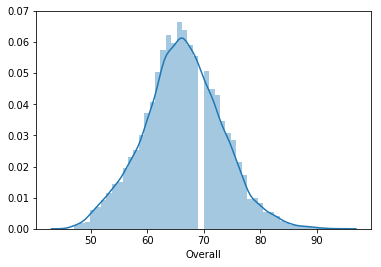

In [72]:
sns.distplot(fifa['Overall'])

In [73]:
#     2. Generate pair plots for the following variables:
# Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

/home/madface/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/madface/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


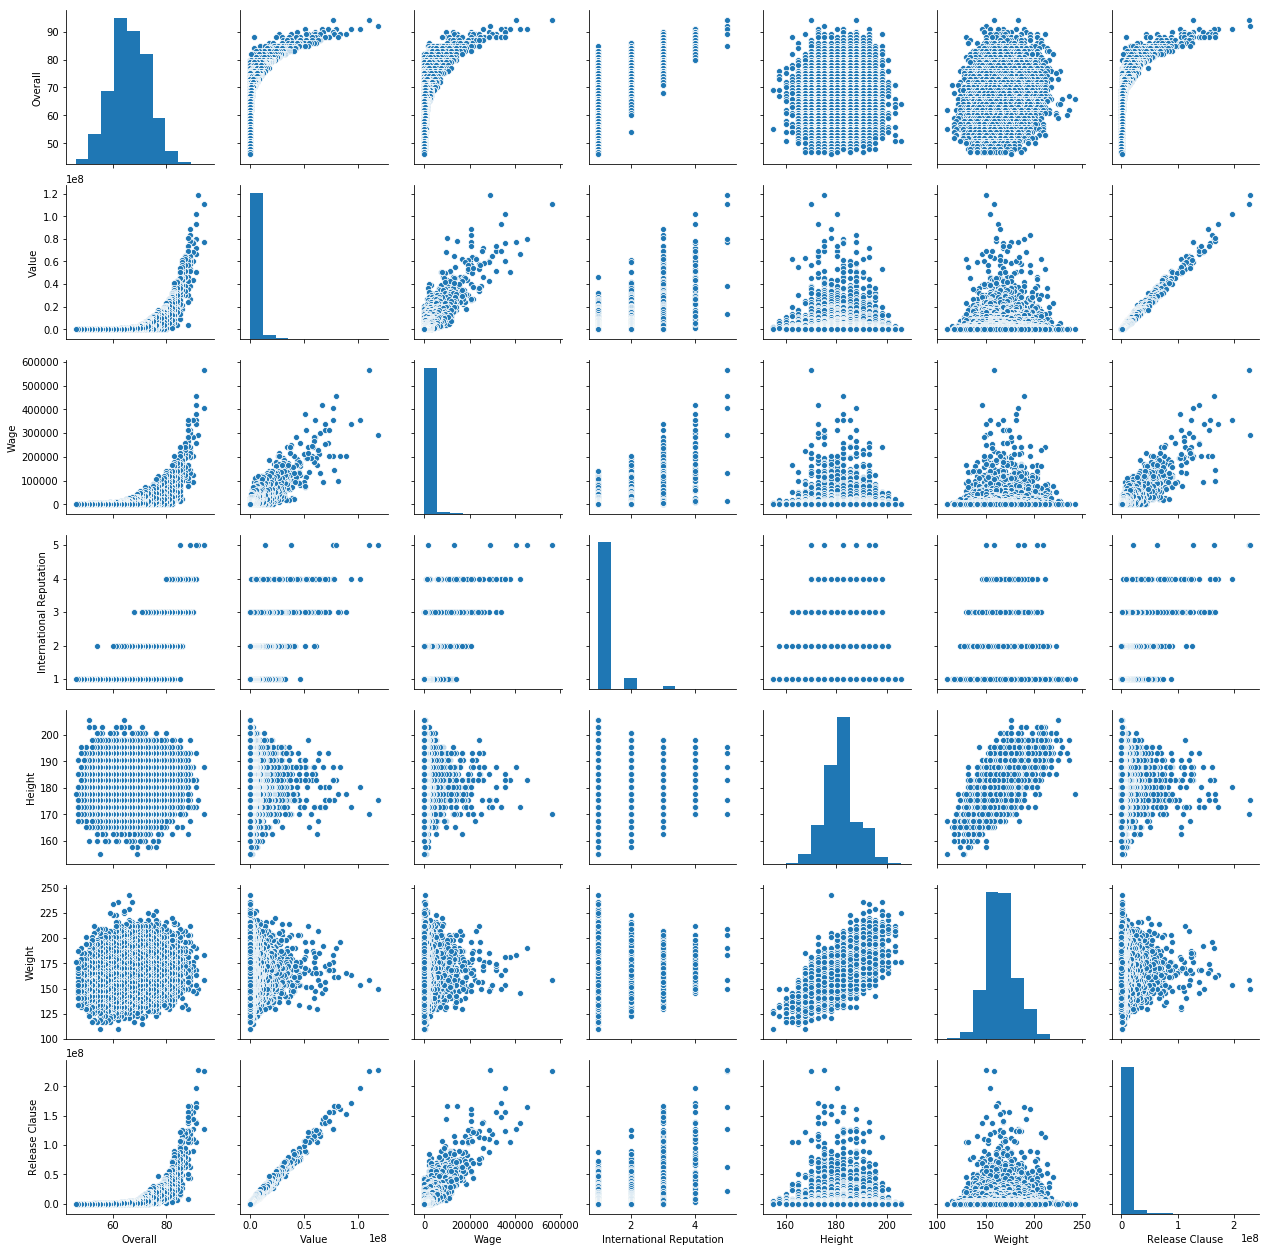

In [74]:
sns.pairplot(fifa[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])




In [ ]:
# #     3. Generate a table containing the top 20 players ranked by Overall score and whose 
# #        contract expires in 2020.
# #         a) What would the average wage for this set of players be?
# #         b) What is the average age?
# #         c) Is there a correlation between the Overall rating and Value for these players?

In [140]:
fifa_ConExp_2020=fifa[fifa['CVU Year']==2020]

In [141]:
fifa_ConExp_2020.shape

(4044, 54)

In [142]:
# a) What would the average wage for this set of players be?

print('The average wage for the players whose contracts would expire in 2020 is {}'.
      format(fifa_ConExp_2020['Wage'].mean()))

The average wage for the players whose contracts would expire in 2020 is 9347.922848664688


In [143]:
# b) What is the average age?

print('The average age for the players whose contracts would expire in 2020 is {} Years'.
      format(round(fifa_ConExp_2020['Age'].mean()),0))

The average age for the players whose contracts would expire in 2020 is 25 Years


In [144]:
#  c) Is there a correlation between the Overall rating and Value for these players?

In [147]:
x=fifa_ConExp_2020[['Overall','Value']].corr()

In [148]:
x

,Overall,Value
Overall,1.00000,0.63088
Value,0.63088,1.00000


In [149]:
#There is moderate correlation between overall rating and value of the player

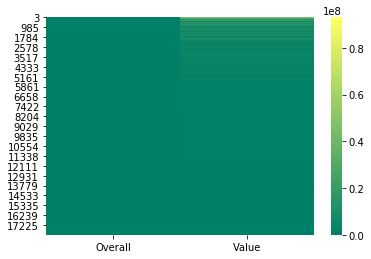

In [150]:
sns.heatmap(fifa_ConExp_2020[['Overall','Value']],cmap='summer')

In [151]:
#     4. Generate tables containing the top 5 players by Overall rating for each unique position.
#         a) Are there any players appearing in more than one Table. Please point out such players.
#         b) What is the average wage one can expect to pay for the top 5 in every position?

In [152]:
fifa_grouped_pos=fifa_ConExp_2020.groupby(['Position'])

In [162]:
fifa_ConExp_2020_top5_by_POSITION=pd.DataFrame()
for i in fifa_ConExp_2020['Position'].unique():
    df=[]
    df=(fifa_ConExp_2020[(fifa_ConExp_2020['Position']==i)]).sort_values('Overall',ascending=False).head(5)
    fifa_ConExp_2020_top5_by_POSITION=pd.concat([fifa_ConExp_2020_top5_by_POSITION,df])


In [171]:
fifa_ConExp_2020_top5_by_POSITION.to_csv('/home/madface/Great_Learning/fifa_ConExp_2020_top5_by_POSITION.csv')

In [179]:
fifa_ConExp_2020_top5_by_POSITION.groupby(['Name']).agg({'Position':'count'}).reset_index().sort_values('Position',ascending=False)

,Name,Position
0,A. Guardado,1
79,Maurício,1
92,Pablo Sarabia,1
91,Oscar,1
90,O. Selnæs,1
89,Nolito,1
88,Nascimentardo,1
87,Nani,1
86,Naldo,1
85,N. Schulz,1


In [184]:
print('The average wage one can expect to pay for the top 5 in every position is {} Euros'.format(fifa_ConExp_2020_top5_by_POSITION['Wage'].mean()))

The average wage one can expect to pay for the top 5 in every position is 77792.0 Euros


,Name,Overall
12,D. Godín,90
38,G. Higuaín,88
41,G. Buffon,88
28,J. Rodríguez,88
51,J. Vertonghen,87
106,Filipe Luís,85
108,Pepe,85
107,V. Kompany,85
94,Y. Brahimi,85
91,Paulinho,85


In [192]:
fifa_ConExp_2020_top20=fifa_ConExp_2020_top5_by_POSITION.sort_values('Overall',ascending=False).head(20)

In [194]:
fifa_ConExp_2020_top20['Overall'].mean()

87.75

In [195]:
fifa_ConExp_2020_top20

,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,CVU Year
3,De Gea,27,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2020.0
6,L. Modrić,32,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2020.0
8,Sergio Ramos,32,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,2020.0
5,E. Hazard,27,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2020.0
13,David Silva,32,90,90,Manchester City,60000000.0,285000.0,Left,4.0,2.0,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,2020.0
21,E. Cavani,31,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,4.0,4.0,...,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0,2020.0
24,G. Chiellini,33,89,89,Juventus,27000000.0,215000.0,Left,4.0,3.0,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0,2020.0
39,Thiago Silva,33,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,4.0,3.0,...,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0,2020.0
31,C. Eriksen,26,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,5.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0,2020.0
49,Jordi Alba,29,87,87,FC Barcelona,38000000.0,250000.0,Left,3.0,3.0,...,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,77900000.0,2020.0


In [ ]:
# ###Here we had compared our top 20 player list with regards to overall rating with other prestigious clubs 
# like barca and we found our average overall rating is far better than them